## 주말, 평일에 따른 따릉이 수요

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df = pd.read_csv('df_sbikedata.csv')

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
#전체 데이터의 모든 변수 확인

df.isnull().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

In [4]:
df.shape

(5827, 11)

In [5]:
df.describe()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
count,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000
mean,11.506607,31.970655,15.666609,0.031811,19.376798,0.075511,2.237601,68.608718,1758.438648,215.117899
std,6.921963,42.609325,13.737597,0.018075,7.501572,0.264236,1.054516,17.277266,490.969394,185.972900
min,0.000000,3.000000,1.000000,0.001000,-3.500000,0.000000,0.000000,19.000000,60.000000,1.000000
25%,6.000000,16.000000,7.000000,0.020000,14.100000,0.000000,1.500000,56.000000,1935.500000,53.000000
50%,12.000000,25.000000,13.000000,0.031000,20.400000,0.000000,2.200000,70.000000,2000.000000,186.000000
75%,18.000000,37.000000,20.000000,0.041000,24.900000,0.000000,2.800000,82.000000,2000.000000,315.000000
max,23.000000,827.000000,125.000000,0.137000,36.300000,1.000000,8.300000,100.000000,2000.000000,1746.000000


In [6]:
df['hour']

0        1
1        2
2        3
3        4
4        5
        ..
5822    20
5823    21
5824    22
5825    23
5826     0
Name: hour, Length: 5827, dtype: int64

In [7]:
# date 컬럼을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'])

# date 컬럼에서 요일(월요일: 0, 일요일: 6)을 나타내는 weekday 컬럼 생성
df['weekday'] = df['date'].dt.weekday

# weekday가 5(토요일) 또는 6(일요일)이면 주말(1), 그 외에는 평일(0)로 나타내는 컬럼 생성
df['weekend'] = np.where(df['weekday'] >= 5, 1, 0)

# hour 열을 기반으로 시간대를 나누는 과정 추가
bins = [0, 6, 12, 18, 24]
labels = ['0-6시', '6-12시', '12-18시', '18-24시']
df['time_group'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False)

# 주말과 평일의 시간대별 따릉이 대여량을 구하기
result_df_weekday = df[df['weekend'] == 0].groupby('time_group')['count'].mean()
result_df_weekend = df[df['weekend'] == 1].groupby('time_group')['count'].mean()

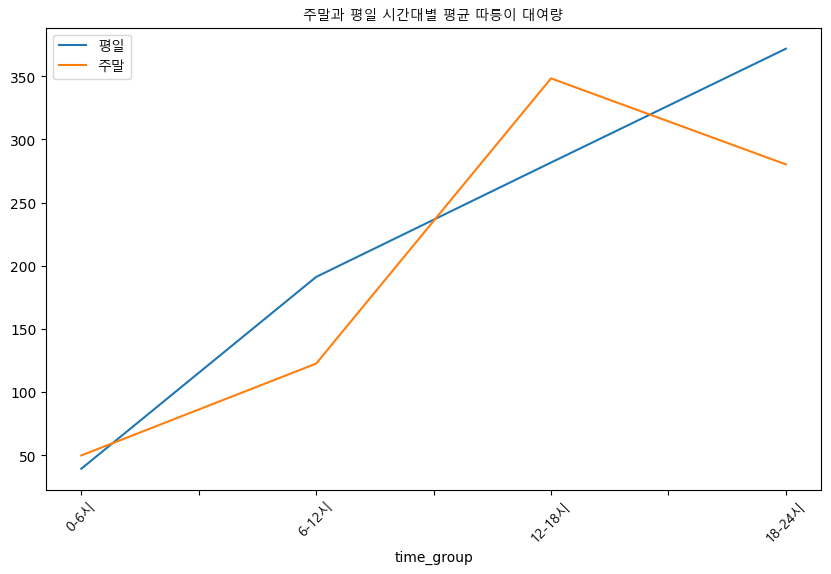

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 사용하고 있는 운영체제에 따라 경로가 다를 수 있습니다.
font_prop = fm.FontProperties(fname=font_path)

# 시각화
plt.figure(figsize=(10, 6))
result_df_weekday.plot(label='평일')
result_df_weekend.plot(label='주말')
plt.title('주말과 평일 시간대별 평균 따릉이 대여량', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14528\1800836358.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weekend', y='count', data=df, ci=None)


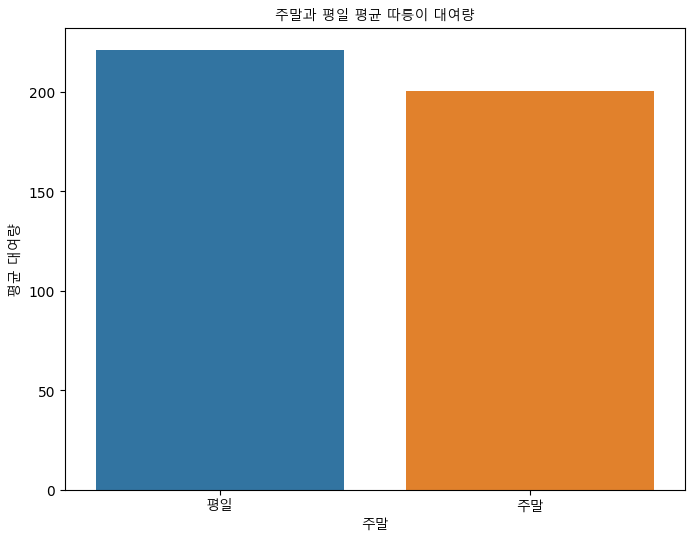

In [9]:
import seaborn as sns

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='weekend', y='count', data=df, ci=None)
plt.xlabel('주말', fontproperties=font_prop)
plt.ylabel('평균 대여량', fontproperties=font_prop)
plt.title('주말과 평일 평균 따릉이 대여량', fontproperties=font_prop)
plt.xticks(ticks=[0, 1], labels=['평일', '주말'], fontproperties=font_prop)
plt.show()

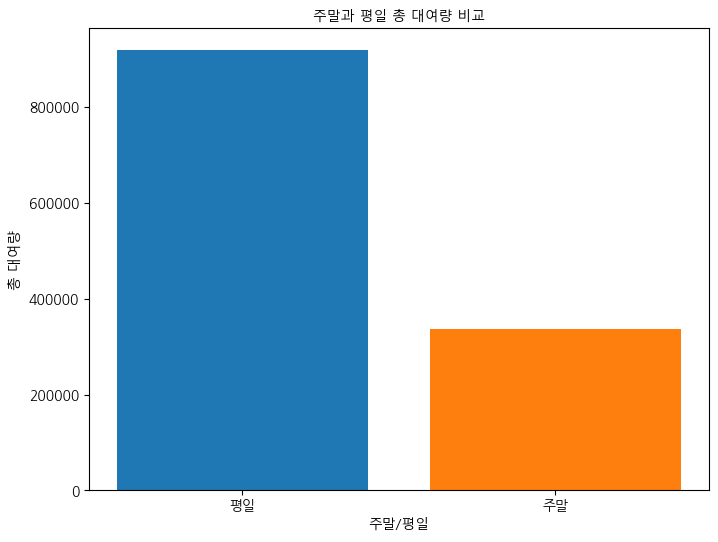

In [10]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 사용 가능한 한글 폰트 목록 확인
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# 설정한 폰트 경로에 따라 경로 변경
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 예시로 나눔 고딕을 사용합니다.

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 주말과 평일의 총 대여량 구하기
total_rental_weekday = df[df['weekend'] == 0]['count'].sum()
total_rental_weekend = df[df['weekend'] == 1]['count'].sum()

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(['평일', '주말'], [total_rental_weekday, total_rental_weekend], color=['#1f77b4', '#ff7f0e'])
plt.xlabel('주말/평일', fontproperties=font_prop)
plt.ylabel('총 대여량', fontproperties=font_prop)
plt.title('주말과 평일 총 대여량 비교', fontproperties=font_prop)
plt.show()
